Contents:
 1) Preliminary code for primary and secondary drying process
 2) Primary Model with scale-up figures
 3) Next steps

# PART 1 - SIMULATOR: Simplified model (Park et al. 2021):

The flow chart of the calculation procedure for the simplified model follows the procedure of Park, et al. (2021).

<img src="figures/flow_chart_partIandII.png" width="300">

## 1. Heat transmitted to sensible heat

<img src="figures/eq1.png" width="300">

1.1 Diffusion of a Gaussian Function

https://fenicsproject.org/pub/tutorial/html/._ftut1006.html

<img src="figures/eq2.png" width="300">

where the local temperature is defined by $u$.


1.2. Heat equation

https://fenics-handson.readthedocs.io/en/latest/heat/doc.html

<img src="figures/eq3.png" width="300">

1.3. Heat equation in moving media

<img src="figures/eq4.png" width="300">


## Some references

https://fenicsproject.discourse.group/t/heat-equation-with-insulating-material/1325

https://home.simula.no/~hpl/homepage/fenics-tutorial/release-1.0-nonabla/webm/timedep.html

https://www.karlin.mff.cuni.cz/~hron/fenics-tutorial/heat/doc.html

https://fenicsproject.discourse.group/t/transient-heat-conduction-problem/10625

https://stackoverflow.com/questions/51763982/solving-the-heat-equation-by-fenics

https://mediatum.ub.tum.de/doc/1467488/1467488.pdf

## Preliminary Heat transfer Analysis.

The Heat transfer equation can be studied following the technoques for solving the Poisson equation, under a set of initial and boundary conditions of bio-pharmaceutical lyophilization:


Plotting Mesh


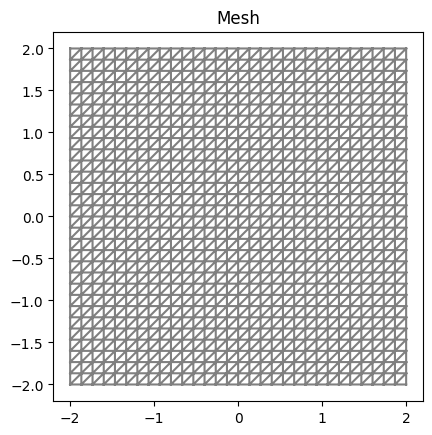

In [1]:
# Import libraries
from fenics import *
import matplotlib.pyplot as plt

# Import time
T = 2.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 30
mesh = RectangleMesh(Point(-2, -2), Point(2, 2), nx, ny)

print("Plotting Mesh")
plot(mesh, title="Mesh")

t = 0.04
n = 0 of 50
Solving linear variational problem.
t = 0.08
n = 1 of 50
Solving linear variational problem.
t = 0.12
n = 2 of 50
Solving linear variational problem.
t = 0.16
n = 3 of 50
Solving linear variational problem.
t = 0.2
n = 4 of 50
Solving linear variational problem.
t = 0.24000000000000002
n = 5 of 50
Solving linear variational problem.
t = 0.28
n = 6 of 50
Solving linear variational problem.
t = 0.32
n = 7 of 50
Solving linear variational problem.
t = 0.36
n = 8 of 50
Solving linear variational problem.
t = 0.39999999999999997
n = 9 of 50
Solving linear variational problem.
t = 0.43999999999999995
n = 10 of 50
Solving linear variational problem.
t = 0.4799999999999999
n = 11 of 50
Solving linear variational problem.
t = 0.5199999999999999
n = 12 of 50
Solving linear variational problem.
t = 0.5599999999999999
n = 13 of 50
Solving linear variational problem.
t = 0.6
n = 14 of 50
Solving linear variational problem.
t = 0.64
n = 15 of 50
Solving linear variational proble

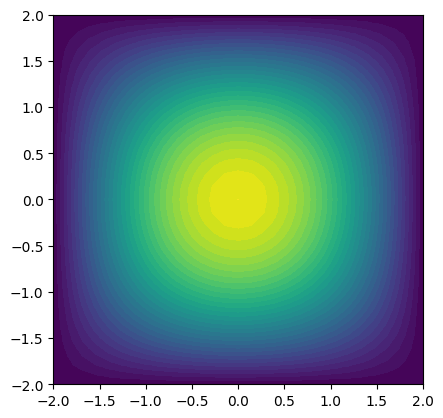

In [2]:

V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0

for n in range(num_steps):

    # Update current time
    t += dt
    print(f't = {t}')
    print(f'n = {n} of {num_steps}')

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    vtkfile << (u, t)
    plot(u)

    # Update previous solution
    u_n.assign(u)


Navier-Stokes equations

https://fenics-handson.readthedocs.io/en/latest/navierstokes/doc.html
https://home.simula.no/~hpl/homepage/fenics-tutorial/release-1.0-nonabla/webm/

# LYOPHILIZATION EXERCISE AND APPROXIMATIONS

https://www.studocu.com/bo/document/universidad-mayor-de-san-simon/laboratorio-de-quimica/chapter-lyophilization/28384324

https://books.google.com.br/books?id=c5yMHputGh4C&pg=PA644&lpg=PA644&dq=karel+m+heat+and+mass+transfer+in+freeze-drying+//+freeze+drying+and+advanced+food+technology-+goldblith&source=bl&ots=u2_-plp5du&sig=ACfU3U1OSw25YvmDXHnCo1Ltbaov6q_hWw&hl=en&sa=X&ved=2ahUKEwi4v9SXl9OBAxV3j5UCHUEZD4EQ6AF6BAhuEAM#v=onepage&q=karel%20m%20heat%20and%20mass%20transfer%20in%20freeze-drying%20%2F%2F%20freeze%20drying%20and%20advanced%20food%20technology-%20goldblith&f=false


# Park et al. (2021) Implementation

https://github.com/lazovasquez/microwave-freeze-drying

Plotting Mesh


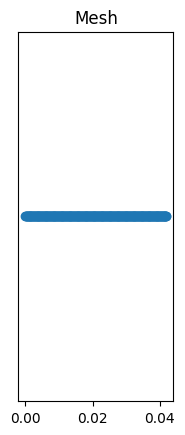

In [1]:
# Import libraries
from fenics import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Parameters
density1=63
density2=917
cp2=1967.8
k2=2.30
Tsub=256.15  # Sublimation temperature
Hsub=2.840e6
pbwi=0.04
pw=0.92
picei=1-pbwi
Hw = 242345
htc=65  # Heat transfer coefficient # W/m^2K # Hottot 2007
Tshelf_i=236.85  # Initial shelf temperature
Tshelf_f=281.85  # Final shelf temperature
Tshelf_r=1/60  # Shelf temperature rising

# import time
T = 3600.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
Length=0.042
edge_n=300; # number of edges
nx = ny = 300

# Calculate term
a = (-Tshelf_r * density2 * cp2 + Hw * pbwi) / (2 * k2) 

# # Square mesh
# mesh = RectangleMesh(Point(0, 0), Point(Length, Length), nx, ny)

# Interval mesh
mesh = IntervalMesh (nx, 0, Length)

print("Plotting Mesh")
plot(mesh, title="Mesh")

# Resolução CFD

In [ ]:
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0

for n in range(num_steps):

    # Update current time
    t += dt
    print(f't = {t}')
    print(f'n = {n} of {num_steps}')

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    vtkfile << (u, t)
    plot(u)

    # Update previous solution
    u_n.assign(u)


## Profiles (Temperature and pressure)

In [3]:
# Analytical expression for the temperature of frozen region that solves all of the 
# equations described the simplified model

# Axial coordinate and time
x_array = np.linspace(0, Length, nx)  # nx
t_array = np.linspace(0, T, num_steps)  # num_steps

T_2 = np.zeros ((nx, num_steps)) #(x,y,z)

# Mesh grid
# x, t = np.meshgrid(x, t)

j = 0
for t in t_array:
    i = 0
    for x in x_array:
        # Temperature
        T_2[i,j] = a * (x_array[j]**2 - Length**2) + 2 * a * Length * k2 / htc + Tshelf_r * t + Tshelf_i
        i += 1

        if any(T_2[i,j]>=Tsub):
            t_Tsub = t
            print(f't_Tsub: {t_Tsub}')
    j += 1


In [4]:
print(T_2[299,10])


243.73263212278957


50
50
300


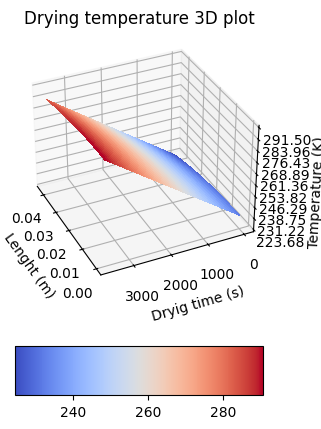

In [21]:

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
x_array = np.linspace(0, Length, nx)
t_array = np.linspace(0, T, num_steps)
x_array, t_array = np.meshgrid(x_array, t_array)

print(len(x_array))
print(len(t_array))

T_2_array =  a * (x_array**2 - Length**2) + 2 * a * Length * k2 / htc + Tshelf_r * t_array + Tshelf_i

print(len(T_2))

# Plot the surface.
surf = ax.plot_surface(x_array, t_array, T_2_array, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
plt.title("Drying temperature 3D plot")
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('Lenght (m)')
ax.set_ylabel('Dryig time (s)')
ax.set_zlabel('Temperature (K)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, orientation="horizontal")
ax.view_init(elev=33, azim=155)

plt.show()

In [ ]:
# Procurar em qual tempo e qual ponto atinge Tsub=256.15  # Sublimation temperature

# t_Tsub

### Then, equation (20) is reorganized to calculate the moving boundary,

<img src="eq5.png" width="300">

Analytical approximation:

<img src="eq6.png" width="300">


In [ ]:
Tshelf = Tshelf_r * t_sub + Tshelf_i

# T_2_tsub = T_2(t=t_sub, x=Length)

T_2_tsub= T_2[0, t_Tsub]

Hb = h * (Tshelf_f - T_2_tsub)
# Hb = 1671
delxdelt = (Hb + Hw) * t_array /((density2 - density1) * Hsub * picei)

Thessalov Sergei

Excel
https://pharmahub.org/resources/lyocalculator/supportingdocs

https://link.springer.com/article/10.1208/s12249-019-1532-7


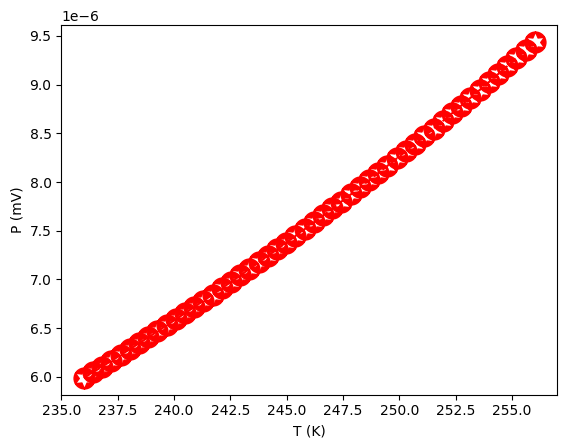

In [24]:


import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np


star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

T2_min = 236
T2_max = 256
T2_array = np.linspace(T2_min, T2_max, num_steps)

# First approach
P_2 = np.exp((24.01849 - 6144.96)/(T2_array +273))

plt.plot(T2_array, P_2, '--r', marker=cut_star, markersize=15)
plt.xlabel('T (K)')
plt.ylabel('P (mV)')
plt.show()

# P_2 = np.exp((24.01849 - 6144.96)/(T_sublsurf +273))


In [ ]:
Kv = 2 * Hsub * m_ice_vial

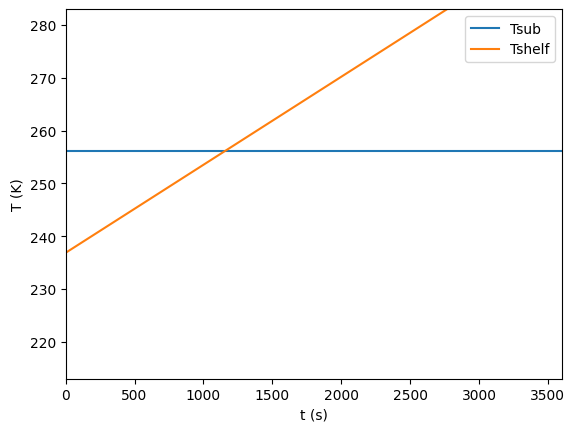

In [44]:
# PLOT WITH TEMPERATURES

import numpy as np
import matplotlib.pyplot as plt

t_array = np.linspace(0, T, num_steps)
Tsub_array = np.full(shape=num_steps, fill_value=Tsub)
# arr = np.arange(0, 11)

Tshelf = Tshelf_r * t_array + Tshelf_i

i=0
for Tshelf_element in Tshelf:
    print
    if any(Tshelf) >= Tsub:
        Tshelf[i] = Tsub
    i += 1

fig, ax = plt.subplots()
ax.plot(t_array, Tsub_array, label='Tsub')
ax.plot(t_array, Tshelf, label='Tshelf')

plt.xlabel('t (s)')
plt.ylabel('T (K)')
# ax.axis('equal')
leg = ax.legend()
ax.axis([0, 3600, 213, 283]) # [xmin, xmax, ymin, ymax]
plt.show()

# Part III - Scaling

Parameters and equations fo Zhu (2023)

In [ ]:

# Parameters
# R0 A1 A2 Ap Kv Kc Kp KD Av Ts pc lmax l

lyo=p0-pc-Av/Ap*Kv*R*(Ts-T-DT)/1833

Kv = Kc + (Kp * pc)/(1 + KD * pc)

sublimation_rate = Ap * (p0 - pc) / R

Workflow of fitting the product resistance by fitting to the product temperature transient using the quasi-steady one-dimensional LyoCalculator.

<img src="figures/flow_chart_partIII.png" width="300">

The equation for the pressure-dependent heat transfer coefficient of typical plastic bag was adopted from the literature [4] as given by

<img src="figures/PIIIeq1.png" width="300">


Product resistance analysis: 

<img src="figures/PIIIeq2.png" width="300">


### Heat transfer coefficient

### Product Resistance